In [1]:
import pandas as pd
from pandas import DataFrame, Series
#false positive warnings all the time:
pd.options.mode.chained_assignment = None

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import statistics

import os.path


In [2]:
#http://matplotlib.org/1.4.0/users/customizing.html

plt.style.use('ggplot')

mpl.rcParams['font.size'] = 18

### LINES
mpl.rcParams['lines.linewidth'] = '2.0'        # line width in points
mpl.rcParams['lines.marker']    = 'None'
mpl.rcParams['lines.markersize']=  '6'          # markersize, in points

###LEGEND
mpl.rcParams['legend.fontsize']='medium'

### GRIDS
mpl.rcParams['grid.color']='black'     # grid color
mpl.rcParams['grid.linestyle'] =':'    # dotted
mpl.rcParams['grid.linewidth']='0.5'   # in points
mpl.rcParams['grid.alpha']='1.0'       # transparency, between 0.0 and 1.0

### TICKS
mpl.rcParams['xtick.labelsize']="small"  # fontsize of the tick labels
mpl.rcParams['xtick.direction']="out"      # direction: in, out, or inout
mpl.rcParams['ytick.labelsize']="small"   # fontsize of the tick labels
mpl.rcParams['ytick.direction']="out"      # direction: in, out, or inout

### AXES
mpl.rcParams['axes.linewidth']  =  '1.0'    # edge linewidth
mpl.rcParams['axes.grid']       =  'True'   # display grid or not
mpl.rcParams['axes.titlesize']  =  'large'  # fontsize of the axes title
mpl.rcParams['axes.labelsize']  = 'large'  # fontsize of the x any y labels
mpl.rcParams['axes.facecolor']= 'white'     # axes background color

mpl.rcParams['figure.facecolor']= '1.0'     # figure facecolor; 0.75 is scalar gray

In [3]:
def generateFilename(bmtuple):
    fname = './runtime_csv/' +  bmtuple[0] + "_N" + str(bmtuple[1]) + "_" + str(bmtuple[2]) + "_" + bmtuple[3] + "_" + bmtuple[4]
    if len(str(bmtuple[5])) != 0:
        fname = fname + "_" + str(bmtuple[5])
    return fname + "_queryruntimes.csv"

def generateSimulationID(tup):
    identifier = tup[0] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + tup[3] \
            + "_" + tup[4] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra


simulation_map = {
    "Watdiv10M": "W10", "Watdiv100M": "W100", "Watdiv1000M": "W1000", "Ontoforce": "Ont"
}

def generateSimulationIDCompact(tup, pref_length=3):
    #pref_length = 3
    identifier = tup[0][:pref_length] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + simulation_map[tup[3]] \
            + "_" + str(tup[4])[:pref_length] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra

In [4]:
def generateFilenameRuntimesCorrect(bmtuple):
    fname = './runtime_csv_correct/' +  bmtuple[0] + "_N" + str(bmtuple[1]) + "_" + str(bmtuple[2]) + "_" + bmtuple[3] + "_" + bmtuple[4]
    if len(str(bmtuple[5])) != 0:
        fname = fname + "_" + str(bmtuple[5])
    return fname + "_queryruntimes_correct.csv"

In [5]:
tuples_Watdiv10M = [('Blazegraph',1,32,'Watdiv10M','Default',''), \
             ('GraphDB',1,32,'Watdiv10M','Default',''), \
             ('ES',1,32,'Watdiv10M','Default',''), \
             ('Virtuoso',1,32,'Watdiv10M','Default','')]

tuples_Watdiv100M = [('Blazegraph',1,32,'Watdiv100M','Default',''), \
             ('GraphDB',1,32,'Watdiv100M','Default',''), \
             ('ES',1,32,'Watdiv100M','Default',''), \
             ('Virtuoso',1,32,'Watdiv100M','Default','')]

tuples_Watdiv1000M_32 = [('Blazegraph',1,32,'Watdiv1000M','Default',''), \
             ('GraphDB',1,32,'Watdiv1000M','Default',''), \
             ('ES',1,32,'Watdiv1000M','Default',''), \
             ('Virtuoso',1,32,'Watdiv1000M','Default','')]


tuples_Watdiv1000M_64 = [('Blazegraph',1,64,'Watdiv1000M','Default',''), \
             ('GraphDB',1,64,'Watdiv1000M','Default',''), \
             ('ES',1,64,'Watdiv1000M','Default',''), \
             ('Virtuoso',1,64,'Watdiv1000M','Default','')]

tuples_Watdiv1000M_64_Opt = [('Blazegraph',1,64,'Watdiv1000M','Optimized',''), \
             ('GraphDB',1,64,'Watdiv1000M','Optimized',''), \
             ('Virtuoso',1,64,'Watdiv1000M','Optimized','')]

tuples_N3_Watdiv1000M = [('ES',3,32,'Watdiv1000M','Default',''), \
             ('Virtuoso',3,32,'Watdiv1000M','Default','')]

tuples_Other_Watdiv100M = [('Fuseki',1,64,'Watdiv100M','Default',''), \
             ('FluidOps',3,64,'Watdiv100M','Default',''), \
             ('LDF',1,64,'Watdiv100M','Default',''), \
             ('LDF',3,64,'Watdiv100M','Default','')]

tuples_Other_Watdiv1000M = [('Fuseki',1,64,'Watdiv1000M','Default',''), \
             ('FluidOps',1,64,'Watdiv1000M','Default',''), \
             ('FluidOps',3,64,'Watdiv1000M','Default',''), \
             ('LDF',1,64,'Watdiv1000M','Default',''), \
             ('LDF',3,64,'Watdiv1000M','Default','')]


tuples_Ontoforce = [('Blazegraph', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('ES', 1, 64, 'Ontoforce', 'Default', ''), \
              ('GraphDB', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 32,'Ontoforce', 'Optimized', 'VWall'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '0'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '2') \
             ]  


tuples_Ontoforce_SUCCESS = [('ES', 1, 64, 'Ontoforce', 'Default', ''), \
              ('GraphDB', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 32,'Ontoforce', 'Optimized', 'VWall'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '0'), \
             ]  


In [6]:
def generate_runtime_comparison_DF(thread_type, bm_tuples):
    interesting_cols = ['query_name', 'thread_type', 'median_runtime']
    df_tot = None

    for bm_tuple in bm_tuples:
        
        filename = generateFilenameRuntimesCorrect(bm_tuple)
        print(filename+ ": " + str(os.path.isfile(filename)))

        df = pd.read_csv(filename, sep='\t')[interesting_cols]
        df = df.rename(columns={'median_runtime': generateSimulationIDCompact(bm_tuple)})
        #print(df.shape)
        
        df = df[df['thread_type'] == thread_type]
        #print(df.shape)

        if df_tot is None:
            df_tot = df
        else:
            df_tot = pd.merge(df_tot, df, how='inner', on=['query_name', 'thread_type'])
            
        #df_tot = df_tot.fillna(timeout)
        
        #print(df_tot.describe())

        
    #df_all = df_tot.drop(['query_name','thread_type'])

    return df_tot

df_tot = generate_runtime_comparison_DF('warmup', tuples_Ontoforce_SUCCESS)
print(df_tot.shape)
df_tot.head(n=5)

./runtime_csv_correct/ES_N1_64_Ontoforce_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Ontoforce_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Ontoforce_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Ontoforce_Optimized_VWall_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N3_64_Ontoforce_Optimized_0_queryruntimes_correct.csv: True
(1189, 7)


,query_name,thread_type,ES_N1_64_Ont_Def,Gra_N1_64_Ont_Opt,Vir_N1_64_Ont_Opt,Vir_N1_32_Ont_Opt_VWall,Vir_N3_64_Ont_Opt_0
0,queries/xab,warmup,1200.0,63.341602,0.048758,0.048881,0.034335
1,queries/xaj,warmup,1200.0,1200.000000,0.349411,0.401682,0.173166
2,queries/xcc,warmup,1200.0,179.001584,0.017770,0.020670,0.022825
3,queries/xed,warmup,1200.0,190.511028,5.825225,33.948868,7.415977
4,queries/xjl,warmup,1200.0,19.836997,4.744620,34.020992,8.120011


In [7]:
df_run2000 = 2000/df_tot.shape[0]  * df_tot.drop(['query_name', 'thread_type'], axis=1).sum()
df_run2000.name = 'run2000time'
df_run2000

ES_N1_64_Ont_Def           961578.010444
Gra_N1_64_Ont_Opt          515712.456638
Vir_N1_64_Ont_Opt           43078.639042
Vir_N1_32_Ont_Opt_VWall     53927.497212
Vir_N3_64_Ont_Opt_0         83870.518420
Name: run2000time, dtype: float64

# 1. Loadtime (done)

# 3. Benchmark Cost per sim

In [8]:
#preprocess cost dataframe
path_cost = './sim_cost.csv'

df_cost = pd.read_csv(path_cost, sep=',', decimal='.')
df_cost.dropna(inplace=True)

df_cost.head(n=5)

df_cost[df_cost['dataset'] == 'Ontoforce'].set_index('sim_id')['tot_cost_per_hour']

sim_id
Bla_N1_64_Ont_Opt          0.665
Gra_N1_64_Ont_Opt          2.065
ES_N1_64_Ont_Def           1.665
Vir_N1_64_Ont_Opt          1.460
Vir_N1_64_Ont_Opt_VWall    1.460
Vir_N1_32_Ont_Opt          0.726
Vir_N1_32_Ont_Opt_VWall    0.726
Vir_N3_64_Ont_Opt_0        4.380
Vir_N3_64_Ont_Opt_1        4.380
Vir_N3_64_Ont_Opt_2        4.380
Vir_N3_64_Ont_Opt_AWS1     4.380
Vir_N3_64_Ont_Opt_AWS2     4.380
Vir_N3_64_Ont_Opt_AWS3     4.380
Fus_N1_64_Ont_Def          0.665
Flu_N1_64_Ont_Def_1        1.330
Flu_N1_64_Ont_Def_2        1.330
Flu_N1_64_Ont_Def_3        1.330
Flu_N3_64_Ont_Def_1        2.660
Flu_N3_64_Ont_Def_2        2.660
Flu_N3_64_Ont_Def_3        2.660
Name: tot_cost_per_hour, dtype: float64

In [9]:
path_load = './loadtimes/Ontoforce_loadtimes.csv'
df_load = pd.read_csv(path_load, sep='\t')
df_load.set_index('sim_id')['load_time']

sim_id
Bla_N1_64_Ont_Opt          650305
ES_N1_64_Ont_Def            98392
Gra_N1_64_Ont_Opt           67803
Vir_N1_64_Ont_Opt           15060
Fus_N1_64_Ont_Def          101300
Flu_N1_64_Ont_Def           15060
Flu_N3_64_Ont_Def            5020
Vir_N1_32_Ont_Opt_VWall     40472
Vir_N3_64_Ont_Opt_0         16513
Name: load_time, dtype: int64

In [10]:
ttype = 'stress'
tuples = tuples_Watdiv10M
path_cost = './sim_cost.csv'
dataset_name = 'Watdiv10M'
path_load = './loadtimes/Watdiv10M_loadtimes.csv'

def createCostDF(tuples, ttype, path_cost, dataset_name, path_load):
        
    df_tot = generate_runtime_comparison_DF(ttype, tuples)
    print(df_tot.shape)                                        
    ser_run2000 = 2000/df_tot.shape[0]  * df_tot.drop(['query_name', 'thread_type'], axis=1).sum()
    ser_run2000.name = 'run2000_time'

    
    
    df_cost = pd.read_csv(path_cost, sep=',', decimal='.')
    df_cost.dropna(inplace=True)

    ser_totcost = df_cost[df_cost['dataset'] == dataset_name].set_index('sim_id')['tot_cost_per_hour']
    
    df_load = pd.read_csv(path_load, sep='\t')
    ser_loadtime = df_load.set_index('sim_id')['load_time']
    
    cost_df = pd.DataFrame([ser_run2000, ser_totcost, ser_loadtime]).T
    
    cost_df['load_cost'] = cost_df['tot_cost_per_hour'] * cost_df['load_time'] / 3600
    cost_df['run2000_cost'] = cost_df['tot_cost_per_hour'] * cost_df['run2000_time'] / 3600

    return cost_df.dropna()
    
createCostDF(tuples, ttype, path_cost, dataset_name, path_load)

./runtime_csv_correct/Blazegraph_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
(1900, 6)


,run2000_time,tot_cost_per_hour,load_time,load_cost,run2000_cost
Bla_N1_32_W10_Def,117.092583,0.333,246.0,0.022755,0.010831
ES_N1_32_W10_Def,581.749255,1.333,601.0,0.222537,0.215409
Gra_N1_32_W10_Def,73.763542,1.083,423.0,0.127252,0.022191
Vir_N1_32_W10_Def,36.125372,0.726,68.0,0.013713,0.007285


## 1. Watdiv10M

./runtime_csv_correct/Blazegraph_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
(1900, 6)


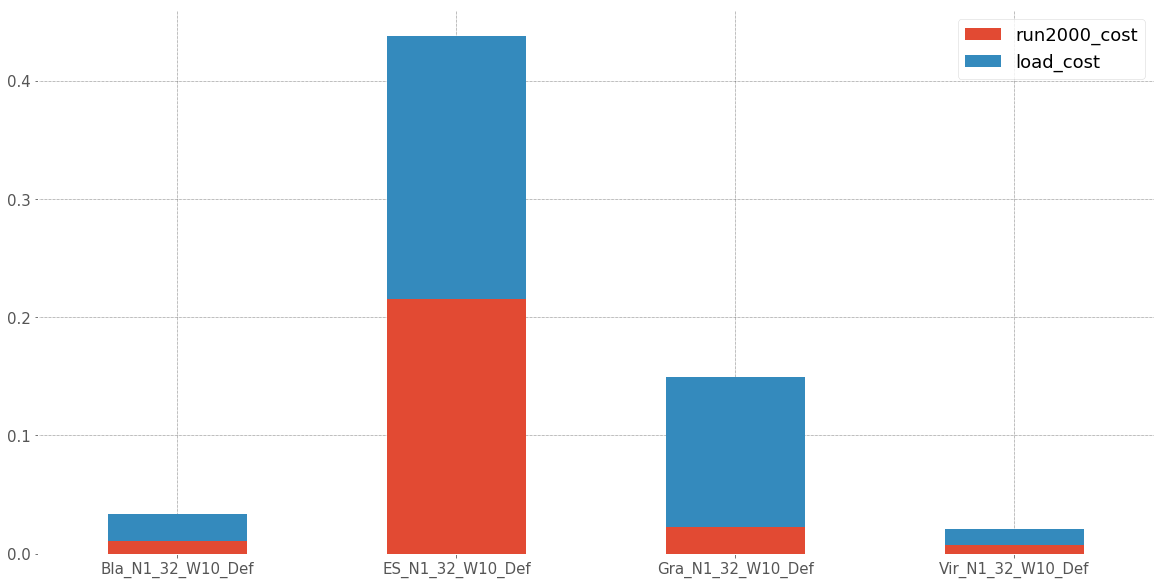

In [13]:
ttype = 'stress'
tuples = tuples_Watdiv10M
path_cost = './sim_cost.csv'
dataset_name = 'Watdiv10M'
path_load = './loadtimes/Watdiv10M_loadtimes.csv'

df = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
df.to_csv('./cost_csv_correct/Watdiv10M_cost.csv', sep='\t', index=False)
df[['run2000_cost','load_cost']].plot(kind='bar', stacked=True, figsize=(20,10))
plt.xticks(rotation='horizontal')
fname= './img/cost2000/Watdiv10M_correct'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.savefig(fname+'.eps', format='eps', bbox_inches='tight', dpi=1200)

## 2. Watdiv100M1

./runtime_csv_correct/Blazegraph_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
(1900, 6)


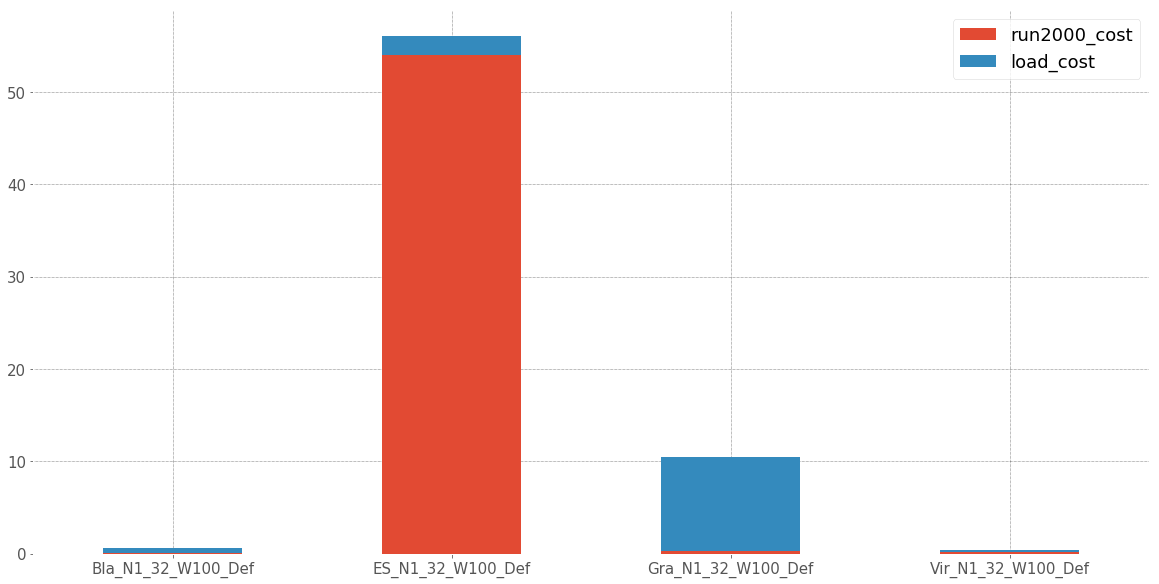

In [14]:
ttype = 'stress'
tuples = tuples_Watdiv100M
path_cost = './sim_cost.csv'
dataset_name = 'Watdiv100M'
path_load = './loadtimes/Watdiv100M1_loadtimes.csv'

df = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
df.to_csv('./cost_csv_correct/Watdiv100M1_cost.csv', sep='\t', index=False)
df[['run2000_cost','load_cost']].plot(kind='bar', stacked=True, figsize=(20,10))
plt.xticks(rotation='horizontal')
fname= './img/cost2000/Watdiv100M1_correct'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.savefig(fname+'.eps', format='eps', bbox_inches='tight', dpi=1200)


## 3. Watdiv100M2

./runtime_csv_correct/Fuseki_N1_64_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/FluidOps_N3_64_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/LDF_N1_64_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/LDF_N3_64_Watdiv100M_Default_queryruntimes_correct.csv: True
(39, 6)


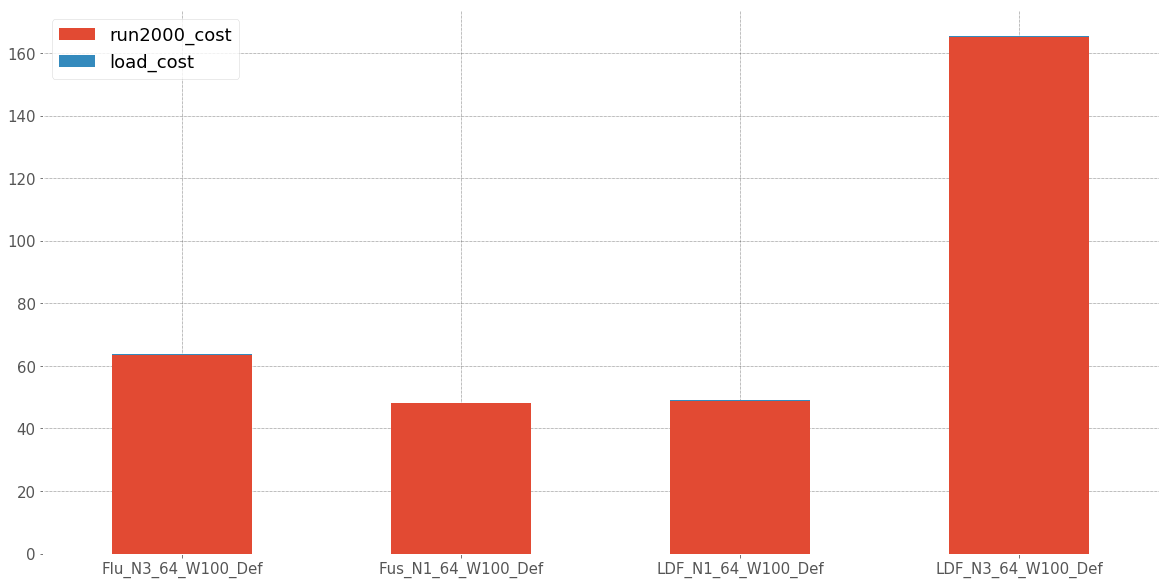

In [15]:
ttype = 'warmup'
tuples = tuples_Other_Watdiv100M
path_cost = './sim_cost.csv'
dataset_name = 'Watdiv100M'
path_load = './loadtimes/Watdiv100M2_loadtimes.csv'

df = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
df.to_csv('./cost_csv_correct/Watdiv100M2_cost.csv', sep='\t', index=False)
df[['run2000_cost','load_cost']].plot(kind='bar', stacked=True, figsize=(20,10))
plt.xticks(rotation='horizontal')
fname= './img/cost2000/Watdiv100M2_correct'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.savefig(fname+'.eps', format='eps', bbox_inches='tight', dpi=1200)


## 4. Watdiv1000M1

./runtime_csv_correct/Blazegraph_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
(148, 6)


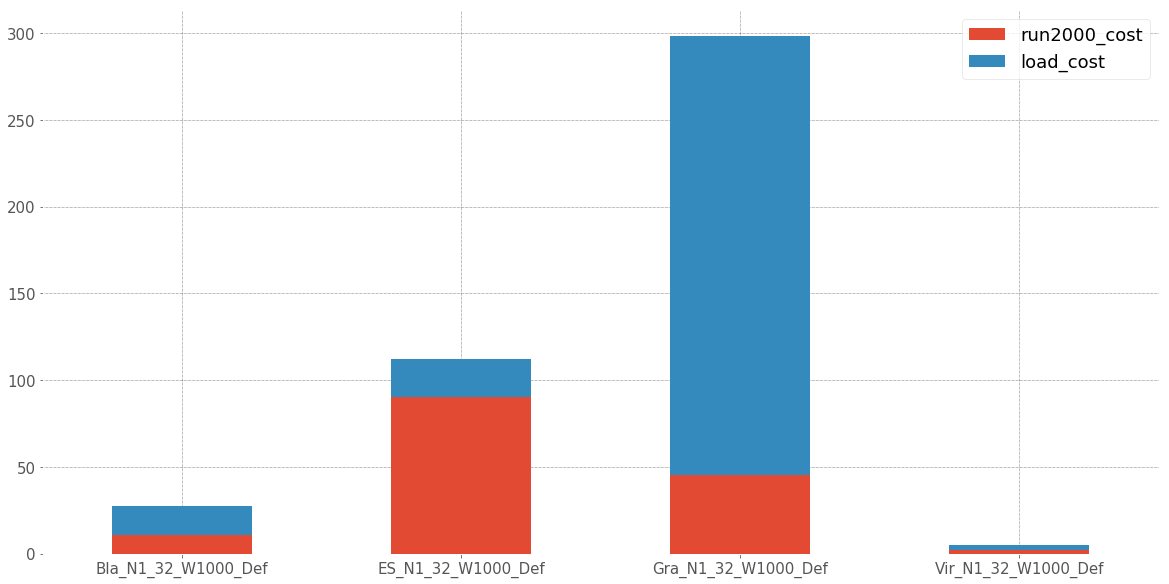

In [16]:
ttype = 'stress'
tuples = tuples_Watdiv1000M_32
path_cost = './sim_cost.csv'
dataset_name = 'Watdiv1000M'
path_load = './loadtimes/Watdiv1000M1_loadtimes.csv'

df = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
df.to_csv('./cost_csv_correct/Watdiv1000M1_cost.csv', sep='\t', index=False)
df[['run2000_cost','load_cost']].plot(kind='bar', stacked=True, figsize=(20,10))
plt.xticks(rotation='horizontal')
fname= './img/cost2000/Watdiv1000M1_correct'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.savefig(fname+'.eps', format='eps', bbox_inches='tight', dpi=1200)



## 5. Watdiv1000M2

./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
(380, 6)


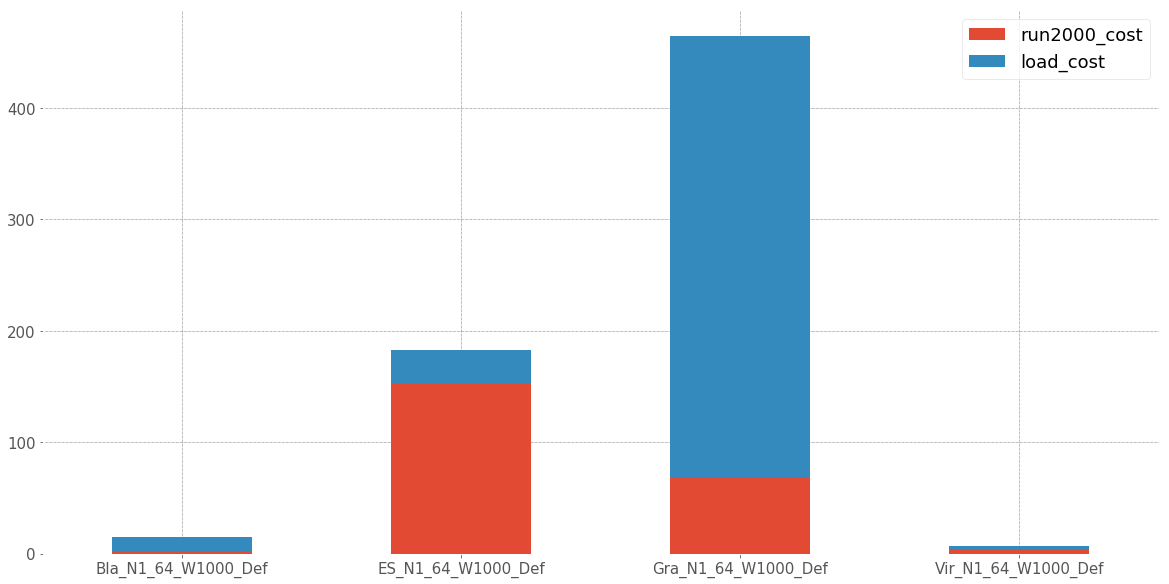

In [17]:

ttype = 'stress'
tuples = tuples_Watdiv1000M_64
path_cost = './sim_cost.csv'
dataset_name = 'Watdiv1000M'
path_load = './loadtimes/Watdiv1000M2_loadtimes.csv'

df = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
df.to_csv('./cost_csv_correct/Watdiv1000M2_cost.csv', sep='\t', index=False)
df[['run2000_cost','load_cost']].plot(kind='bar', stacked=True, figsize=(20,10))
plt.xticks(rotation='horizontal')
fname= './img/cost2000/Watdiv1000M2_correct'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.savefig(fname+'.eps', format='eps', bbox_inches='tight', dpi=1200)


## 5. Ontoforce

./runtime_csv_correct/ES_N1_64_Ontoforce_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Ontoforce_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Ontoforce_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Ontoforce_Optimized_VWall_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N3_64_Ontoforce_Optimized_0_queryruntimes_correct.csv: True
(819, 7)


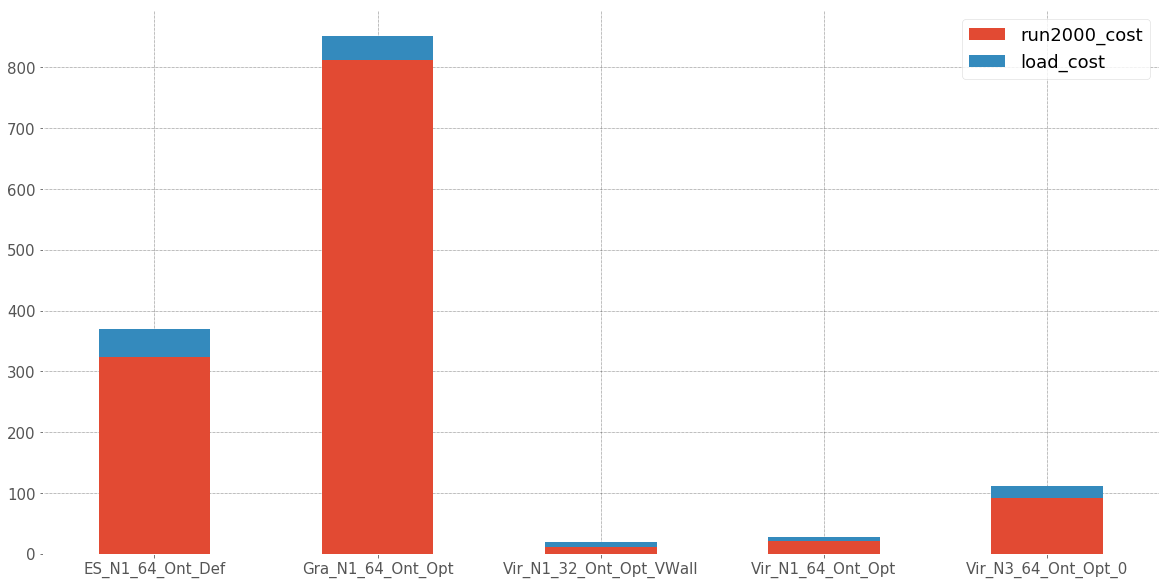

In [18]:



ttype = 'stress'
tuples = tuples_Ontoforce_SUCCESS
path_cost = './sim_cost.csv'
dataset_name = 'Ontoforce'
path_load = './loadtimes/Ontoforce_loadtimes.csv'

df = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
df.to_csv('./cost_csv_correct/Ontoforce_cost.csv', sep='\t', index=False)
df[['run2000_cost','load_cost']].plot(kind='bar', stacked=True, figsize=(20,10))
plt.xticks(rotation='horizontal')
fname= './img/cost2000/Ontoforce_correct'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.savefig(fname+'.eps', format='eps', bbox_inches='tight', dpi=1200)


In [19]:
df

,run2000_time,tot_cost_per_hour,load_time,load_cost,run2000_cost
ES_N1_64_Ont_Def,6.999802e+05,1.665,98392.0,45.506300,323.740838
Gra_N1_64_Ont_Opt,1.417421e+06,2.065,67803.0,38.892554,813.048618
Vir_N1_32_Ont_Opt_VWall,5.539920e+04,0.726,40472.0,8.161853,11.172173
Vir_N1_64_Ont_Opt,5.030372e+04,1.460,15060.0,6.107667,20.400952
Vir_N3_64_Ont_Opt_0,7.516349e+04,4.380,16513.0,20.090817,91.448916


## Figures for paper

./runtime_csv_correct/Blazegraph_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
(148, 6)
./runtime_csv_correct/ES_N3_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N3_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
(1890, 4)
./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
(380, 6)
./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./run

FileNotFoundError: [Errno 2] No such file or directory: './img/ForPaper/AllSims_Correct.svg'

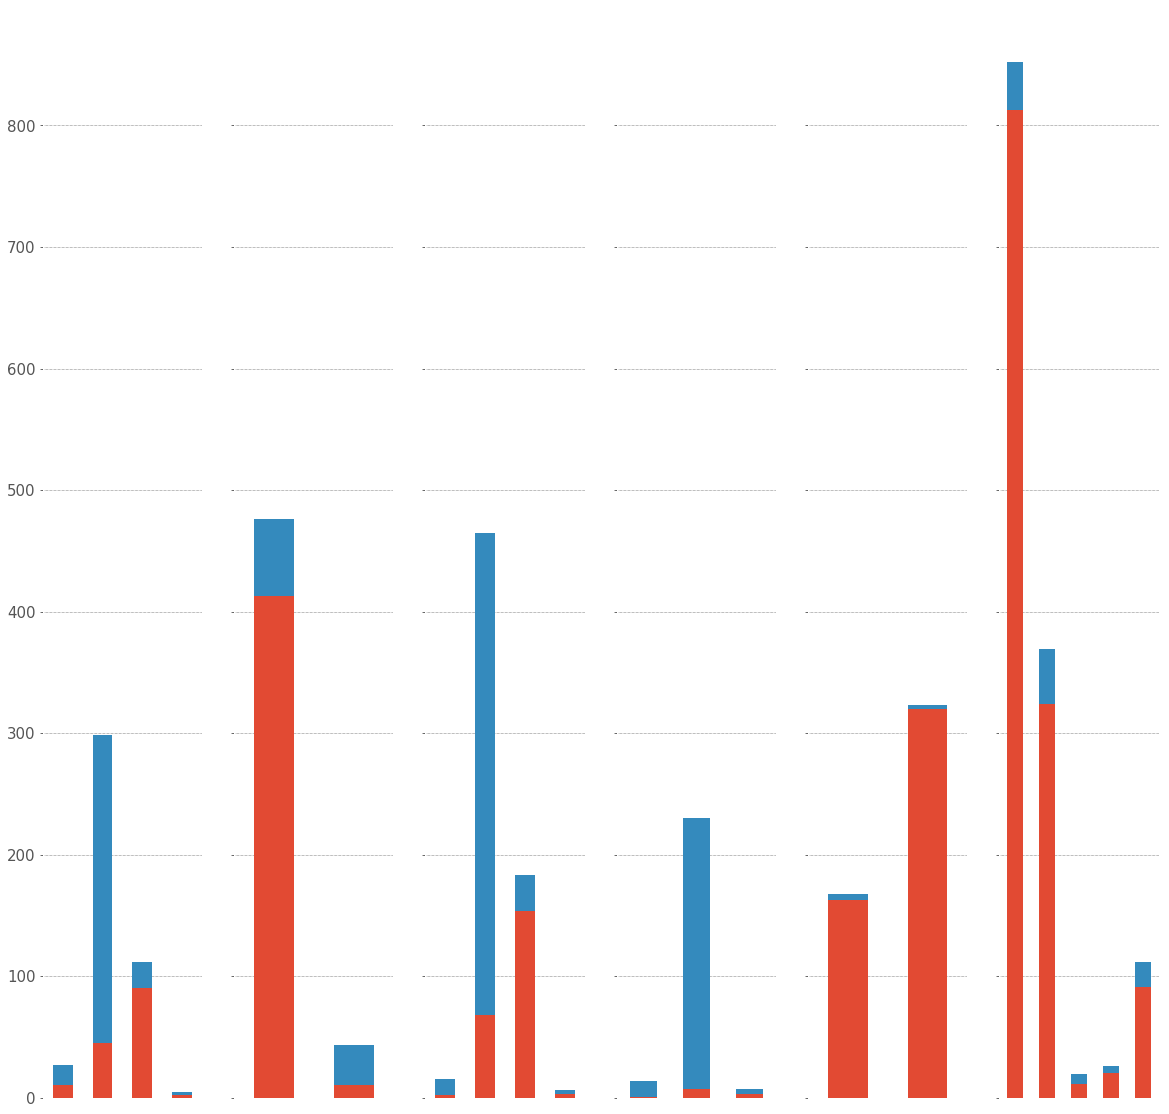

In [20]:
fig, ax = plt.subplots(1,6, figsize=(20,20), sharey=True)

ttype = 'stress'
path_cost = './sim_cost.csv'

tuples = tuples_Watdiv1000M_32
dataset_name = 'Watdiv1000M'
path_load = './loadtimes/Watdiv1000M1_loadtimes.csv'
df1 = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
old_index = list(df1.index) 
new_index = [old_index[0], old_index[2], old_index[1] ] + old_index[3:]
df1[['run2000_cost','load_cost']].loc[new_index].plot(kind='bar', ax=ax[0], stacked=True, legend=False)

tuples = tuples_N3_Watdiv1000M
dataset_name = 'Watdiv1000M'
path_load = './loadtimes/Watdiv1000M1_loadtimes.csv'
df2 = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
df2[['run2000_cost','load_cost']].plot(kind='bar', ax=ax[1], stacked=True, legend=False)

tuples = tuples_Watdiv1000M_64
dataset_name = 'Watdiv1000M'
path_load = './loadtimes/Watdiv1000M2_loadtimes.csv'
df3 = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
old_index = list(df3.index) 
new_index = [old_index[0], old_index[2], old_index[1] ] + old_index[3:]
df3[['run2000_cost','load_cost']].loc[new_index].plot(kind='bar', ax=ax[2], stacked=True, legend=False)

tuples = tuples_Watdiv1000M_64_Opt
dataset_name = 'Watdiv1000M'
path_load = './loadtimes/Watdiv1000M2_loadtimes.csv'
df4 = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
df4[['run2000_cost','load_cost']].plot(kind='bar', ax=ax[3], stacked=True, legend=False)

tuples = tuples_Other_Watdiv1000M[3:]
dataset_name = 'Watdiv1000M'
path_load = './loadtimes/Watdiv1000M2_loadtimes.csv'
df5 = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
df5[['run2000_cost','load_cost']].plot(kind='bar', ax=ax[4], stacked=True, legend=False)

tuples = tuples_Ontoforce_SUCCESS
dataset_name = 'Ontoforce'
path_load = './loadtimes/Ontoforce_loadtimes.csv'
df6 = createCostDF(tuples, ttype, path_cost, dataset_name, path_load)
old_index = list(df6.index) 
new_index = [old_index[1], old_index[0]] + old_index[2:]
df6[['run2000_cost','load_cost']].loc[new_index].plot(kind='bar', ax=ax[5], stacked=True, legend=False)

for i in range(0,6):
    ax[i].set_xticks([])
fname= './img/ForPaper/AllSims_Correct'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.savefig(fname+'.eps', format='eps', bbox_inches='tight', dpi=1200)


In [ ]:
df1[['run2000_cost','load_cost']]

In [ ]:
df2[['run2000_cost','load_cost']]

In [ ]:
df3[['run2000_cost','load_cost']]

In [21]:
df4[['run2000_cost','load_cost']]

,run2000_cost,load_cost
Bla_N1_64_W1000_Opt,0.718728,12.862393
Gra_N1_64_W1000_Opt,7.251239,223.295333
Vir_N1_64_W1000_Opt,3.288285,3.754633


In [22]:
df5[['run2000_cost','load_cost']]

,run2000_cost,load_cost
LDF_N1_64_W1000_Def,162.507679,5.087619
LDF_N3_64_W1000_Def,319.976409,3.372289


In [23]:
df6[['run2000_cost','load_cost']]

,run2000_cost,load_cost
ES_N1_64_Ont_Def,323.740838,45.506300
Gra_N1_64_Ont_Opt,813.048618,38.892554
Vir_N1_32_Ont_Opt_VWall,11.172173,8.161853
Vir_N1_64_Ont_Opt,20.400952,6.107667
Vir_N3_64_Ont_Opt_0,91.448916,20.090817
